# **Student Dropout Prediction**
## Created by **Ramses Alexander Coraspe Valdez**
## Created on August 5, 2020

# Installing libraries

In [32]:
# install.packages("genalg")
# install.packages("tidyverse")
# install.packages("cluster")
# install.packages("factoextra")
# install.packages("corrplot")
# install.packages("party")
# install.packages("neuralnet")

# **Importing libraries**

In [33]:
library(genalg)
library(ggplot2)
library(tidyverse)
library(cluster)    
library(factoextra) 
library(neuralnet)

# **Building the dataset**

In [34]:
get_data_assistance <- function(data_r, r1, r2) {
    
  assistance <- vector()
  for(i in 1:1000){
    assistance <- c(assistance, round((sum(asistencias.totales[[i]][,r1:r2]==0) *100) / 192))
  }
  assistance
}

get_data_Biblio <- function(data_r, r1, r2) {  
  suma <- 0
  for(i in 1:1000){
    suma <- suma + sum(data_r[[i]][,r1:r2])
  }  
  factor_biblio <- (round(suma)/1000)/6  
  uso_biblio <- vector()
  for(i in 1:1000){
    uso_biblio <- c(uso_biblio,sum(data_r[[i]][,r1:r2]>=factor_biblio))
  }  
  uso_biblio
}
get_data_plataforma <- function(data_r, r1, r2) {  

  suma <- 0
  for(i in 1:1000){
    suma <- suma + sum(data_r[[i]][,r1:r2])
  }  
  factor_plataforma <- (round(suma)/1000)/6  
  uso_plat <- vector()
  for(i in 1:1000){
    uso_plat <- c(uso_plat,sum(data_r[[i]][,r1:r2]>=factor_plataforma))
  }  
  uso_plat
}
get_data_libros <- function(data_r, r1, r2) {  

  suma <- 0
  for(i in 1:1000){
    suma <- suma + sum(data_r[[i]][,r1:r2])
  }  
  factor_apartado <- (round(suma)/1000)/6  
  apa_Lib <- vector()
  for(i in 1:1000){
    apa_Lib <- c(apa_Lib,sum(data_r[[i]][,r1:r2]>=factor_apartado))
  }  
  apa_Lib
}
get_data_pagos <- function(data_r) {  
  promedio.pagos.mtx <-matrix(,nrow=0,ncol=1)  
  for (i in 1:1000) {
    pagos.vct <- vector()
    pagos.vct[1] <- mean(data_r[[i]][,1:2]) 
    promedio.pagos.mtx <- rbind(promedio.pagos.mtx,pagos.vct)
  }  
  rownames(promedio.pagos.mtx) <- 1:1000  
  #Si hay mas de un retraso enciendo la alarma con 0
  promedio.pagos.mtx[promedio.pagos.mtx < 1.875] <- 0  
  #Minimo un retraso y no se considera con status de pago en alarma
  promedio.pagos.mtx[promedio.pagos.mtx >= 1.875] <- 1  
  promedio.pagos.mtx  
}

get_data_examenes <- function(data_r, r1, r2){  
  promedio.examenes.mtx <- matrix(,nrow=0,ncol=1)  
  for (i in 1:1000) {
    resultados.vct <- vector()
    resultados.vct[1] <- round(mean(data_r[[i]][,r1:r2]))
    promedio.examenes.mtx <- rbind(promedio.examenes.mtx,resultados.vct)    
  }
  rownames(promedio.examenes.mtx) <- 1:1000  
  promedio.examenes.mtx    
}
get_data_trabajos <- function(data_r, r1, r2){  
  promedio.trabajos.mtx <- matrix(,nrow=0,ncol=1)
  for (i in 1:1000) {
    resultados.vct <- vector()
    resultados.vct[1] <- round(mean(data_r[[i]][,r1:r2]))
    promedio.trabajos.mtx <- rbind(promedio.trabajos.mtx,resultados.vct)    
  }
  rownames(promedio.trabajos.mtx) <- 1:1000
  promedio.trabajos.mtx
}
range01 <- function(x){(x-min(x))/(max(x)-min(x))}

In [35]:
load("AsistenciasTotales.R")
f_as_1 <-  get_data_assistance(asistencias.totales, 1, 6)
f_as_2 <-  get_data_assistance(asistencias.totales, 7, 12)

load("perfilAlumnos.R")
perfil.alumnos$genero <- as.numeric(perfil.alumnos$genero)
perfil.alumnos[perfil.alumnos$genero==2,]$genero <- 0
perfil.alumnos$evalucion.socioeconomica <- as.numeric(perfil.alumnos$evalucion.socioeconomica)
perfil.alumnos$edad.ingreso <- as.numeric(perfil.alumnos$edad.ingreso)
data_set <- cbind(perfil.alumnos, f_as_1, f_as_2)

load("ResultadosExamenes.R")
f_examenes_1 <- get_data_examenes(resultados.examenes.totales, 1,6) 
f_examenes_2 <- get_data_examenes(resultados.examenes.totales, 7,12)
data_set <- cbind(data_set, f_examenes_1, f_examenes_2)

load("ResultadoTrabajos.R")
f_trabajos_1 <- get_data_trabajos(resultados.trabajos.totales, 1, 6)
f_trabajos_2 <- get_data_trabajos(resultados.trabajos.totales, 7, 12)
data_set <- cbind(data_set, f_trabajos_1, f_trabajos_2)

load("UsoBiblioteca.R")
f_bibl_1 <-  get_data_Biblio(uso.biblioteca.totales, 1, 6)
f_bibl_2 <-  get_data_Biblio(uso.biblioteca.totales, 7, 12)
data_set <- cbind(data_set, f_bibl_1, f_bibl_2)


load("UsoPlataforma.R")
f_plat_1 <- get_data_plataforma(uso.plataforma.totales, 1, 6)
f_plat_2 <- get_data_plataforma(uso.plataforma.totales, 7, 12)
data_set <- cbind(data_set, f_plat_1, f_plat_2)

load("ApartadoDeLibros.R")
f_libros_1 <- get_data_libros(separacion.libros.totales, 1, 6)
f_libros_2 <- get_data_libros(separacion.libros.totales, 7, 12)
data_set <- cbind(data_set, f_libros_1, f_libros_2)

load("Becas.R")
data_set <- cbind(data_set, distribucion.becas)

load("HistorialPagos.R")
f_pagos_status <-  get_data_pagos(registro.pagos)
data_set <- cbind(data_set, f_pagos_status)

load("CambioCarrera.R")
datos.integrados.R <- cbind(data_set, cambio.carrera)


In [36]:
write.csv(datos.integrados.R,"datos.integrados.csv", row.names = TRUE)
datos.integrados <- read.csv("datos.integrados.csv")
rownames(datos.integrados) <- 1:1000
datos.integrados$X <- NULL

In [37]:
set.seed(3)
ind <- sample(x=c(0,1),size=nrow(datos.integrados),replace=TRUE,prob = c(0.9,0.1))
Training.set <- datos.integrados[ind==0,]
Test.set <- datos.integrados[ind==1,]
Test.set.aux <- Test.set

In [38]:
head(Training.set,20)

genero admision.letras admision.numeros promedio.preparatoria edad.ingreso
1  0      60.09373        35.18746         70.28119              18          
2  0      59.07874        33.15747         67.23621              17          
3  0      53.14335        21.28669         60.00000              15          
4  1      57.00416        29.00832         61.01248              16          
5  0      61.47273        37.94545         74.41818              18          
6  0      61.94897        38.89794         75.84691              18          
7  0      53.95962        22.91924         60.00000              15          
8  0      58.18162        31.36324         64.54486              17          
9  1      51.86664        18.73327         60.00000              14          
10 0      58.71761        32.43522         66.15282              17          
11 1      65.50890        46.01780         86.52669              20          
12 0      63.77891        42.55782         81.33672              19          
13 0      58.80883        32.61766         66.42650              17          
14 0      64.93722        44.87445         84.81167              19          
15 0      63.70695        42.41390         81.12085              19          
16 0      60.44674        35.89347         71.34021              18          
17 0      55.22528        25.45056         60.00000              16          
18 0      59.02425        33.04850         67.07274              17          
19 0      64.62761        44.25521         83.88282              19          
20 1      62.41489        39.82979         77.24468              18          
   evalucion.socioeconomica nota.conducta f_as_1 f_as_2 f_examenes_1 ⋯
1  4                        16             7      8     14           ⋯
2  4                        15            10      9     14           ⋯
3  4                        13            12      8     13           ⋯
4  4                        14             3      5     15           ⋯
5  4                        16            10      9     13           ⋯
6  4                        16            11      3     14           ⋯
7  4                        13             1      3     15           ⋯
8  4                        15             2     11     15           ⋯
9  4                        12             1      7     12           ⋯
10 4                        15             1      3     15           ⋯
11 4                        18             5      5     12           ⋯
12 4                        17             5     12     13           ⋯
13 4                        15             4      5     16           ⋯
14 4                        17             9      3     13           ⋯
15 4                        17             9      4     16           ⋯
16 4                        16             3      5     14           ⋯
17 4                        14             9      4     12           ⋯
18 4                        15             2      3     15           ⋯
19 4                        17             8     16     12           ⋯
20 3                        16             6      3     15           ⋯
   f_trabajos_2 f_bibl_1 f_bibl_2 f_plat_1 f_plat_2 f_libros_1 f_libros_2
1  11           2        0        2        0        2          0         
2  13           2        1        2        1        2          1         
3  12           1        0        1        0        1          0         
4  14           4        3        4        3        4          3         
5  12           1        1        1        1        1          1         
6  13           3        2        3        2        3          2         
7  16           5        6        5        6        5          6         
8  13           4        2        4        2        4          2         
9  13           0        1        0        1        0          1         
10 14           4        3        4        3        4          3         
11 13           0        1        0        1        0       

In [39]:
head(Test.set,100)

genero admision.letras admision.numeros promedio.preparatoria edad.ingreso
28  0      55.63921        26.27841          60.00000             16          
54  0      70.68884        56.37767         100.00000             22          
56  0      63.93171        42.86342          81.79514             19          
73  1      54.75777        24.51554          60.00000             15          
74  0      58.90748        32.81496          66.72245             17          
85  0      62.20121        39.40242          76.60363             18          
90  0      59.63022        34.26044          68.89066             17          
115 1      64.62147        44.24293          83.86440             19          
161 1      63.26583        41.53166          79.79749             19          
198 0      53.24743        21.49485          60.00000             15          
216 1      53.25774        21.51549          60.00000             15          
227 0      60.48656        35.97312          71.45967             18          
248 1      58.21060        31.42120          64.63180             17          
260 1      54.93548        24.87096          60.00000             15          
262 0      62.38870        39.77740          77.16611             18          
265 0      64.90177        44.80354          84.70530             19          
273 1      57.59423        30.18845          62.78268             17          
274 0      61.11368        37.22735          73.34103             18          
288 0      58.71338        32.42675          66.14013             17          
297 1      65.77899        46.55797          87.33696             20          
303 0      56.84657        28.69315          60.53972             16          
310 1      54.11977        23.23953          60.00000             15          
316 0      69.98217        54.96434          99.94652             21          
319 0      73.22244        61.44488         100.00000             23          
327 0      58.84063        32.68125          66.52188             17          
329 0      60.11155        35.22311          70.33466             18          
330 1      60.22234        35.44467          70.66701             18          
336 1      58.27874        31.55748          64.83622             17          
353 0      51.97457        18.94915          60.00000             14          
360 1      70.06041        55.12082         100.00000             22          
⋮   ⋮      ⋮               ⋮                ⋮                     ⋮           
732 1      49.95738        14.91477         60.00000              13          
737 1      55.53983        26.07967         60.00000              16          
741 0      58.37427        31.74853         65.12280              17          
759 1      57.96982        30.93963         63.90945              17          
796 0      52.19961        19.39922         60.00000              14          
798 0      48.29472        11.58944         60.00000              13          
801 0      49.37466        13.74931         60.00000              13          
806 1      56.36764        27.73529         60.00000              16          
813 0      63.72920        42.45839         81.18759              19          
817 1      63.78246        42.56491         81.34737              19          
819 0      56.33342        27.66684         60.00000              16          
826 0      59.89541        34.79082         69.68623              17          
833 0      63.92665        42.85330         81.77995              19          
842 0      62.27159        39.54318         76.81477              18          
844 0      57.23457        29.46914         61.70370              16          
857 1      55.78184        26.56369         60.00000              16          
858 1      65.12464        45.24927         85.37391              20          
867 1      65.58739        46.17479         86.76218              20          
899 0      57.91743        30.83486         63.75228  

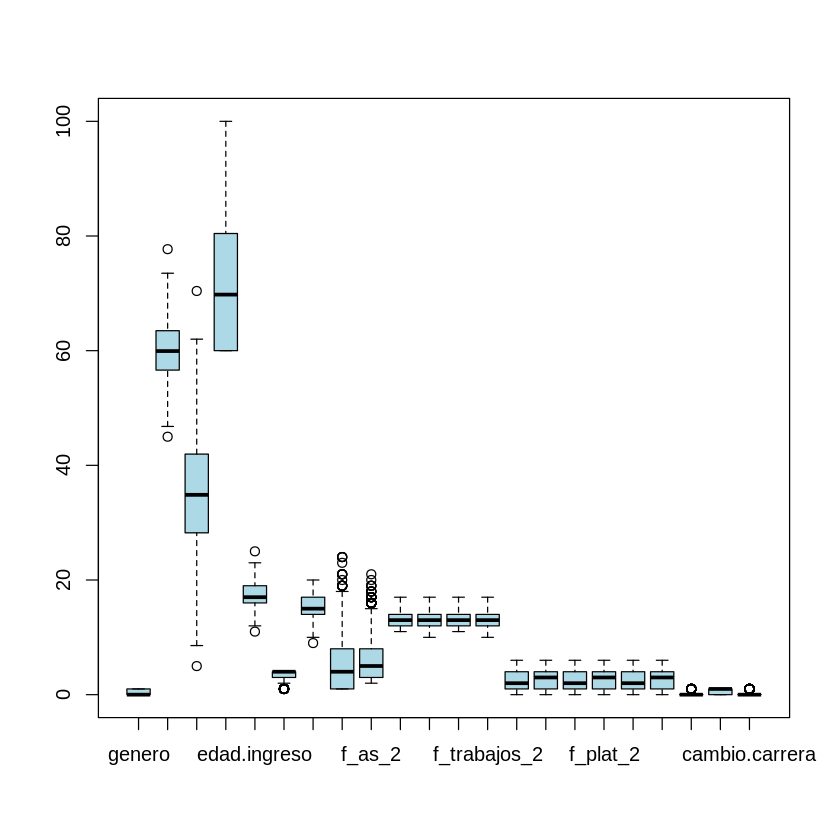

In [40]:
boxplot(Training.set, col = "lightblue")
# Training.set <- apply(Training.set , MARGIN = 2, FUN = function(X) (X - min(X))/diff(range(X)))
# Training.set <- as.data.frame(scale(Training.set))
# boxplot(Training.set,col = "lightblue")

# **Checking for correlations between variables**


$r
                         row                   column      cor             p
1                     genero       distribucion.becas  0.55000  1.000000e-72
2                     genero           cambio.carrera  0.41000  1.200000e-38
3         distribucion.becas           cambio.carrera  0.75000 1.800000e-164
4                     genero           f_pagos_status -0.01500  6.600000e-01
5         distribucion.becas           f_pagos_status -0.03400  3.000000e-01
6             cambio.carrera           f_pagos_status -0.00720  8.300000e-01
7                     genero                   f_as_1  0.06700  4.600000e-02
8         distribucion.becas                   f_as_1  0.04900  1.400000e-01
9             cambio.carrera                   f_as_1  0.03300  3.200000e-01
10            f_pagos_status                   f_as_1  0.06100  6.600000e-02
11                    genero                   f_as_2  0.08000  1.700000e-02
12        distribucion.becas                   f_as_2  0.04600  1.700000e-01
13            cambio.carrera                   f_as_2 -0.00039  9.900000e-01
14            f_pagos_status                   f_as_2  0.12000  3.200000e-04
15                    f_as_1                   f_as_2  0.46000  4.700000e-48
16                    genero               f_libros_1 -0.05600  9.400000e-02
17        distribucion.becas               f_libros_1 -0.01500  6.500000e-01
18            cambio.carrera               f_libros_1  0.00710  8.300000e-01
19            f_pagos_status               f_libros_1 -0.32000  6.200000e-23
20                    f_as_1               f_libros_1 -0.46000  8.900000e-48
21                    f_as_2               f_libros_1 -0.52000  1.400000e-64
22                    genero                 f_bibl_1 -0.05600  9.400000e-02
23        distribucion.becas                 f_bibl_1 -0.01500  6.500000e-01
24            cambio.carrera                 f_bibl_1  0.00710  8.300000e-01
25            f_pagos_status                 f_bibl_1 -0.32000  6.200000e-23
26                    f_as_1                 f_bibl_1 -0.46000  8.900000e-48
27                    f_as_2                 f_bibl_1 -0.52000  1.400000e-64
28                f_libros_1                 f_bibl_1  1.00000  0.000000e+00
29                    genero                 f_plat_1 -0.05600  9.400000e-02
30        distribucion.becas                 f_plat_1 -0.01500  6.500000e-01
31            cambio.carrera                 f_plat_1  0.00710  8.300000e-01
32            f_pagos_status                 f_plat_1 -0.32000  6.200000e-23
33                    f_as_1                 f_plat_1 -0.46000  8.900000e-48
34                    f_as_2                 f_plat_1 -0.52000  1.400000e-64
35                f_libros_1                 f_plat_1  1.00000  0.000000e+00
36                  f_bibl_1                 f_plat_1  1.00000  0.000000e+00
37                    genero             f_examenes_1 -0.02000  5.600000e-01
38        distribucion.becas             f_examenes_1  0.00310  9.300000e-01
39            cambio.carrera             f_examenes_1  0.02000  5.500000e-01
40            f_pagos_status             f_examenes_1 -0.28000  3.900000e-18
41                    f_as_1             f_examenes_1 -0.35000  2.900000e-27
42                    f_as_2             f_examenes_1 -0.41000  1.800000e-37
43                f_libros_1             f_examenes_1  0.90000 3.499961e-320
44                  f_bibl_1             f_examenes_1  0.90000 3.499961e-320
45                  f_plat_1             f_examenes_1  0.90000 3.499961e-320
46                    genero             f_trabajos_1 -0.02200  5.200000e-01
47        distribucion.becas             f_trabajos_1  0.00170  9.600000e-01
48            cambio.carrera             f_trabajos_1  0.02100  5.400000e-01
49            f_pagos_status             f_trabajos_1 -0.29000  1.500000e-18
50                    f_as_1             f_trabajos_1 -0.35000  5.200000e-28
51                    f_as_2             f_trabajos_1 -0.41000  5.8000

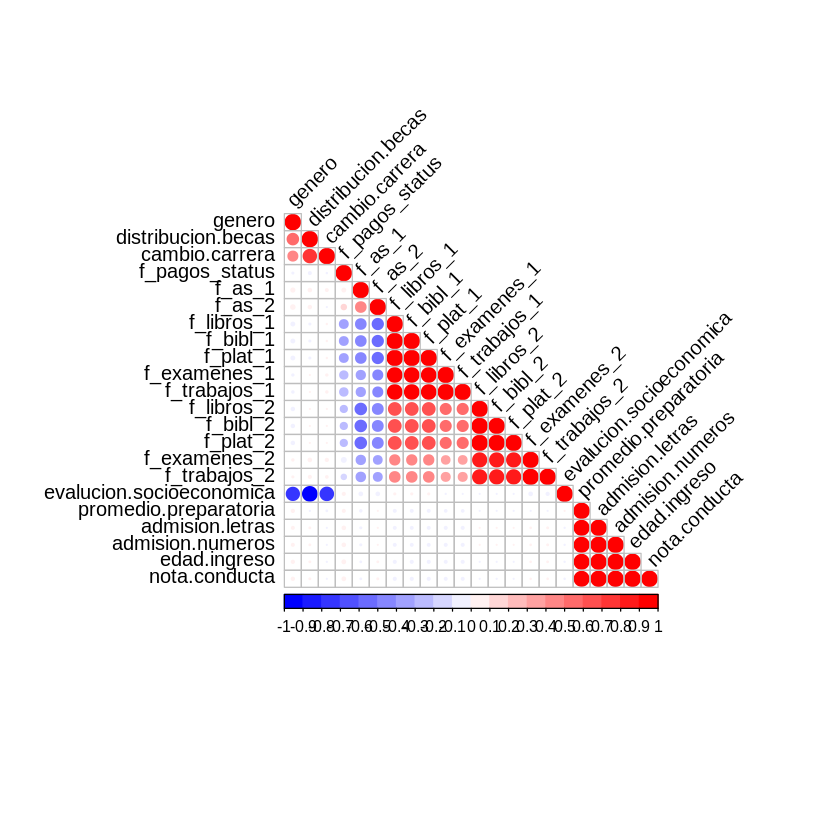

In [41]:
source("http://www.sthda.com/upload/rquery_cormat.r")

col<- colorRampPalette(c("blue", "white", "red"))(20)
rquery.cormat(Training.set, type="flatten", col=col)

# **Removing highly correlated features**

In [42]:
Training.set$nota.conducta <- NULL
Training.set$f_plat_1 <- NULL
Training.set$f_plat_2 <- NULL
Training.set$f_libros_1 <- NULL
Training.set$f_libros_2 <- NULL
Training.set$f_trabajos_1 <- NULL
Training.set$f_trabajos_2 <- NULL

# **Labeling the students using Clustering Analysis with k-means**

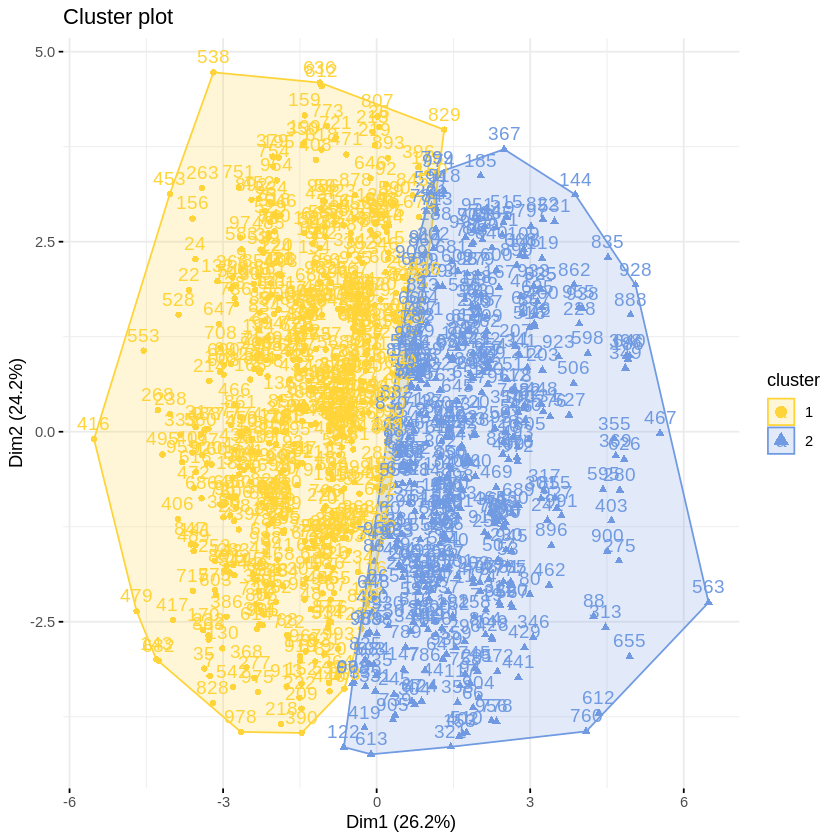

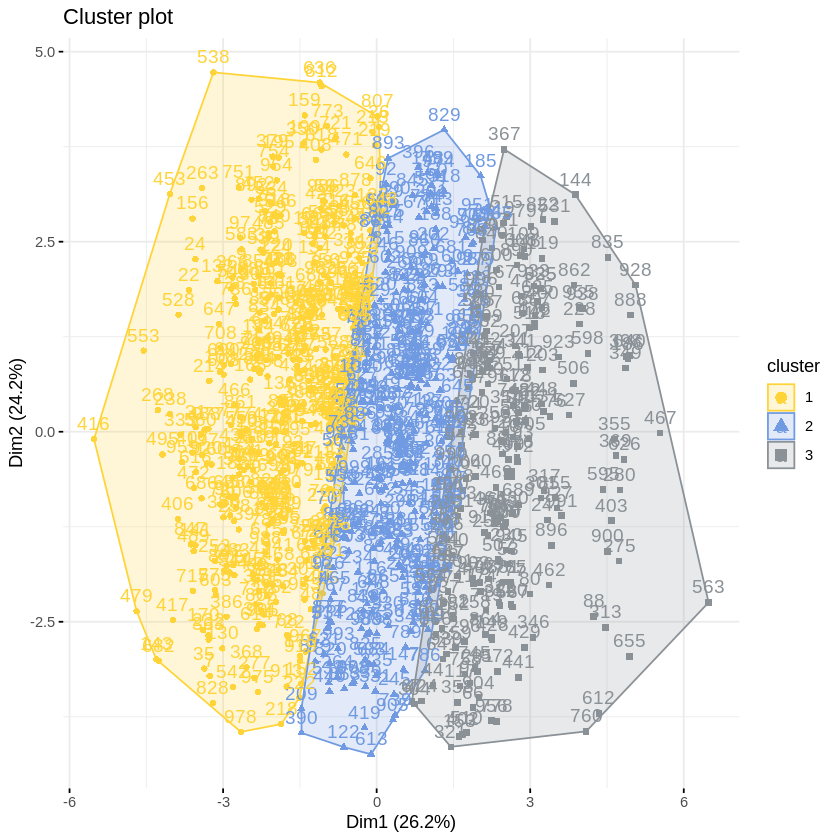

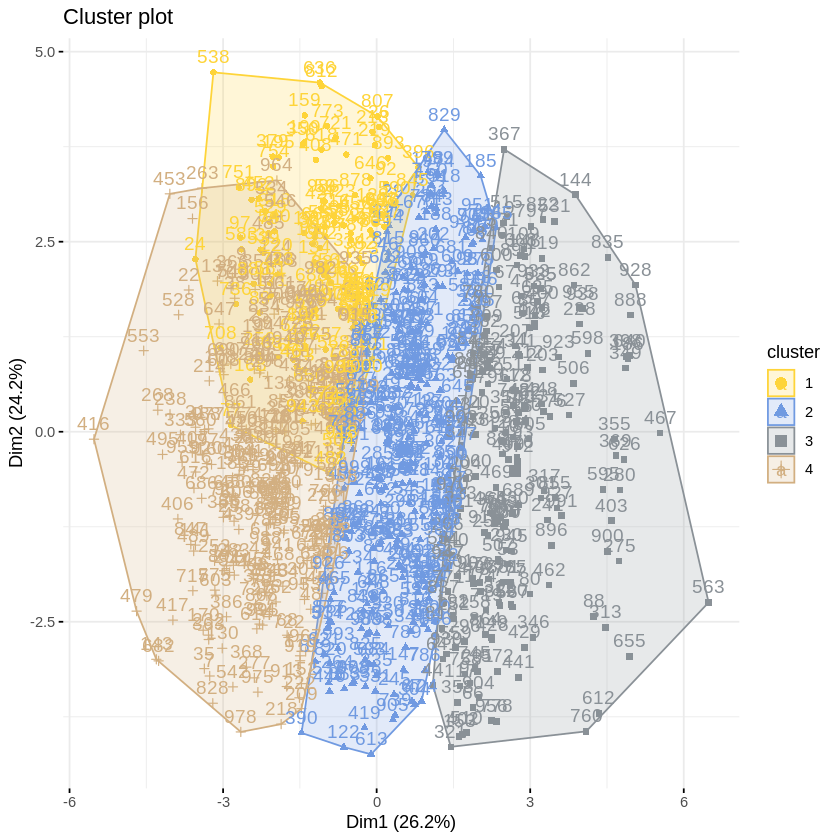

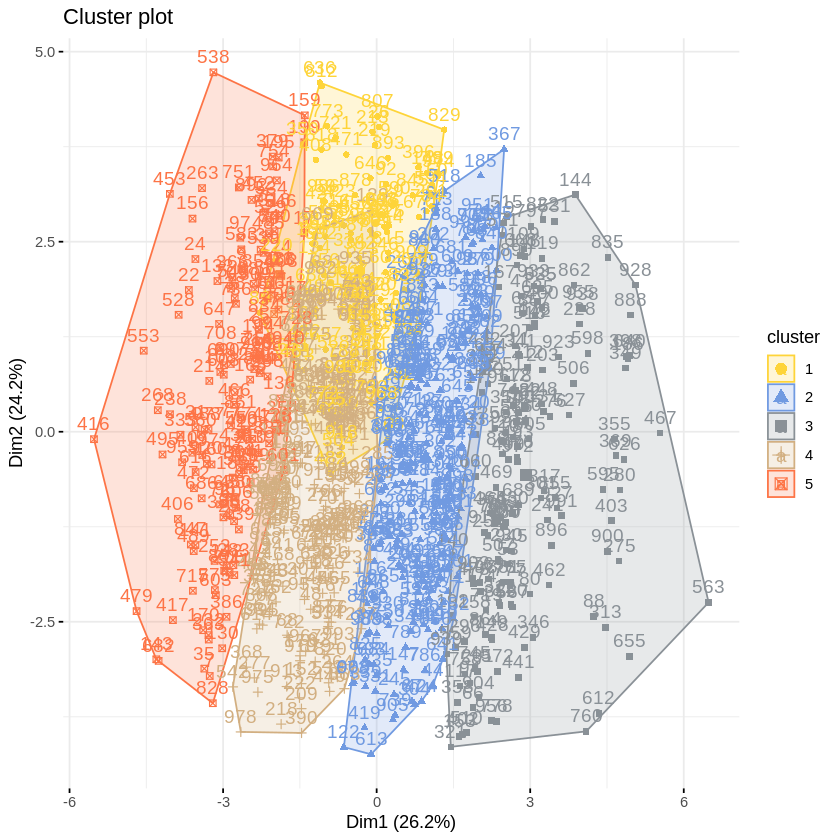

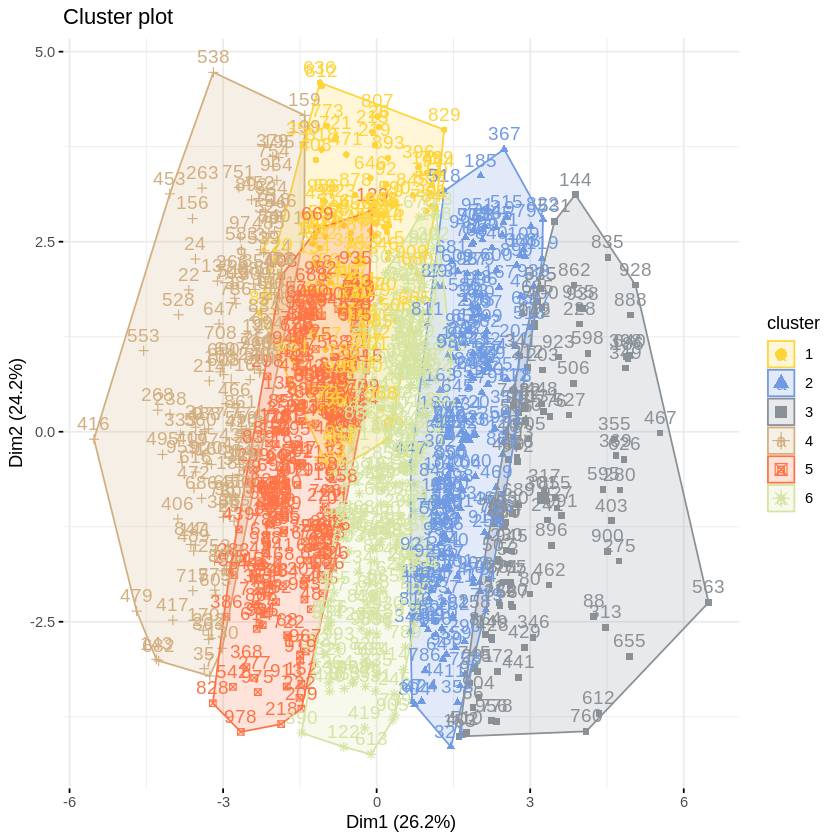

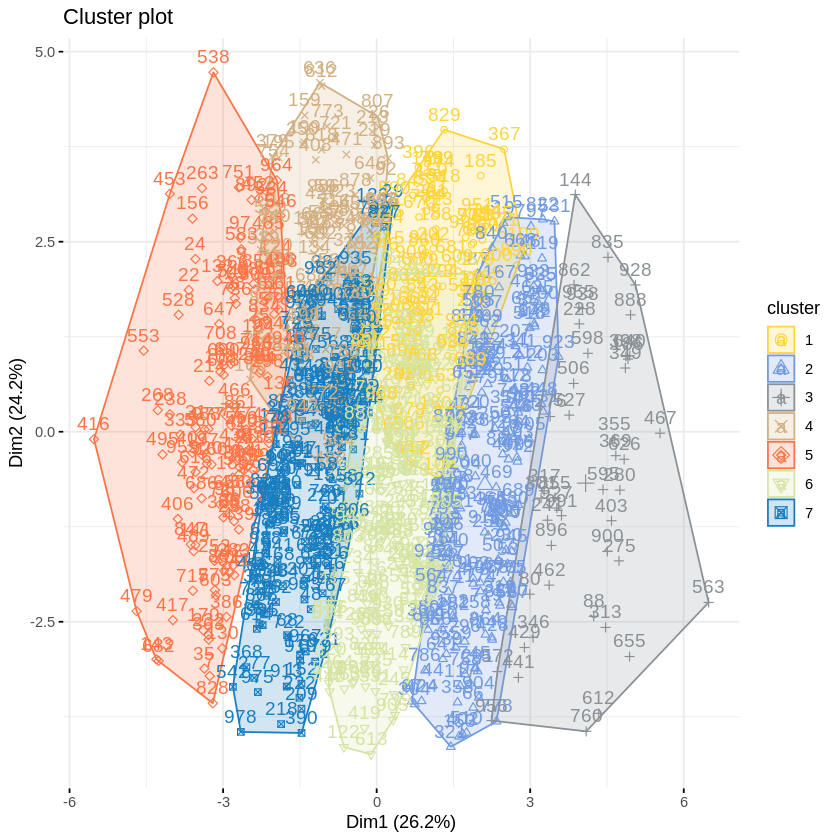

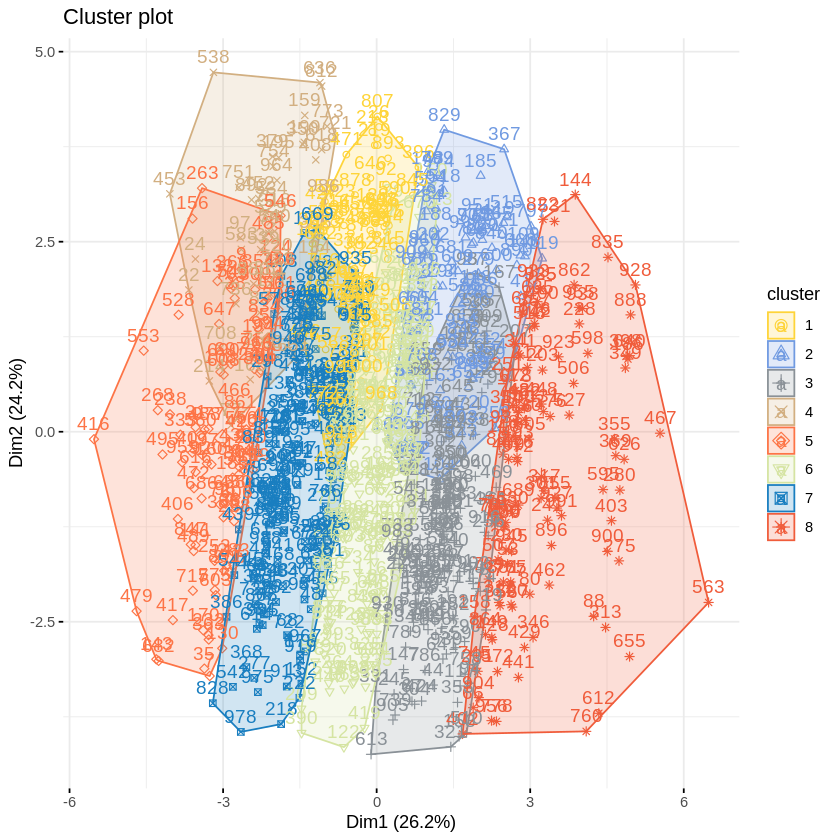

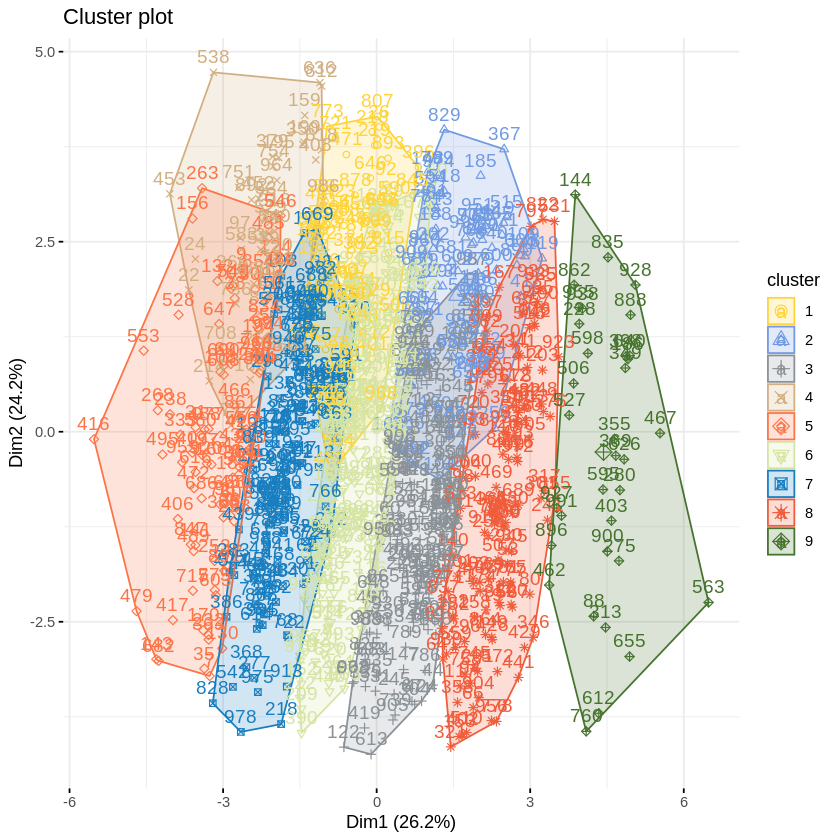

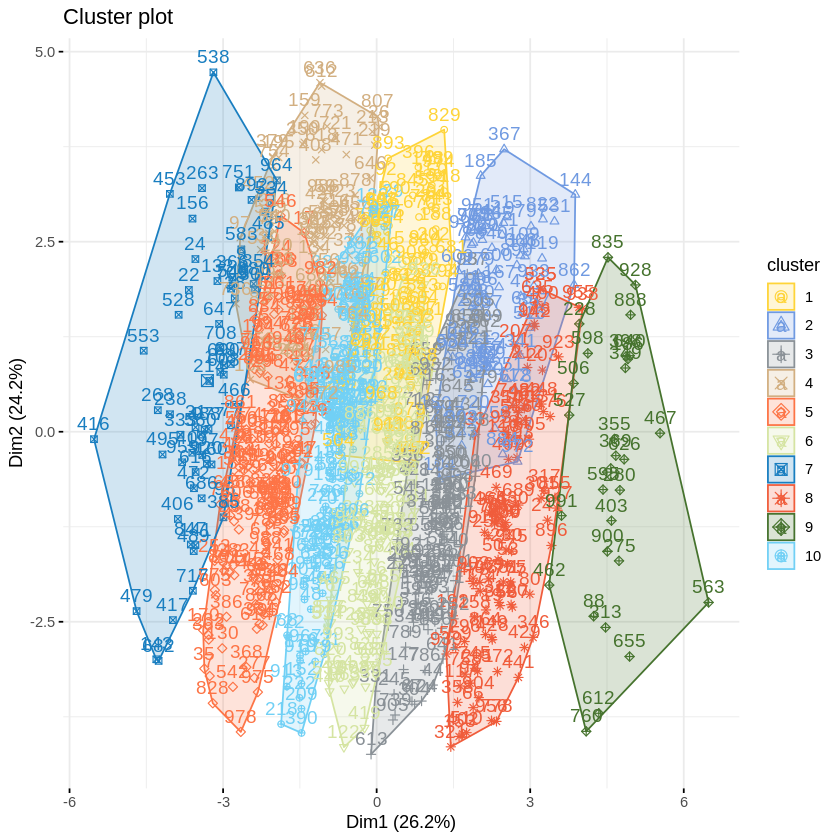

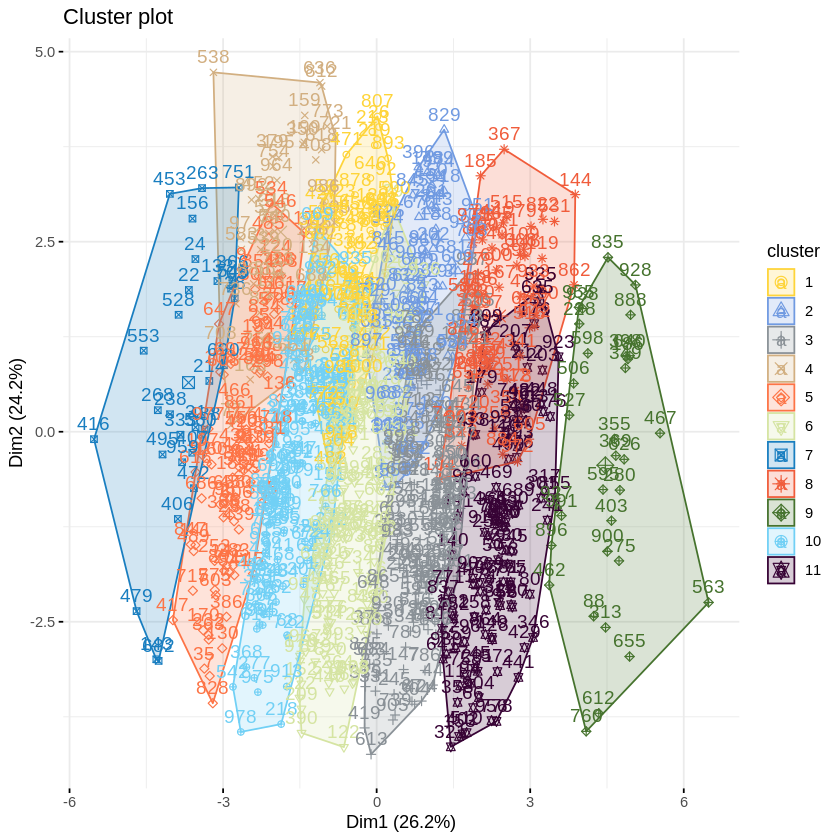

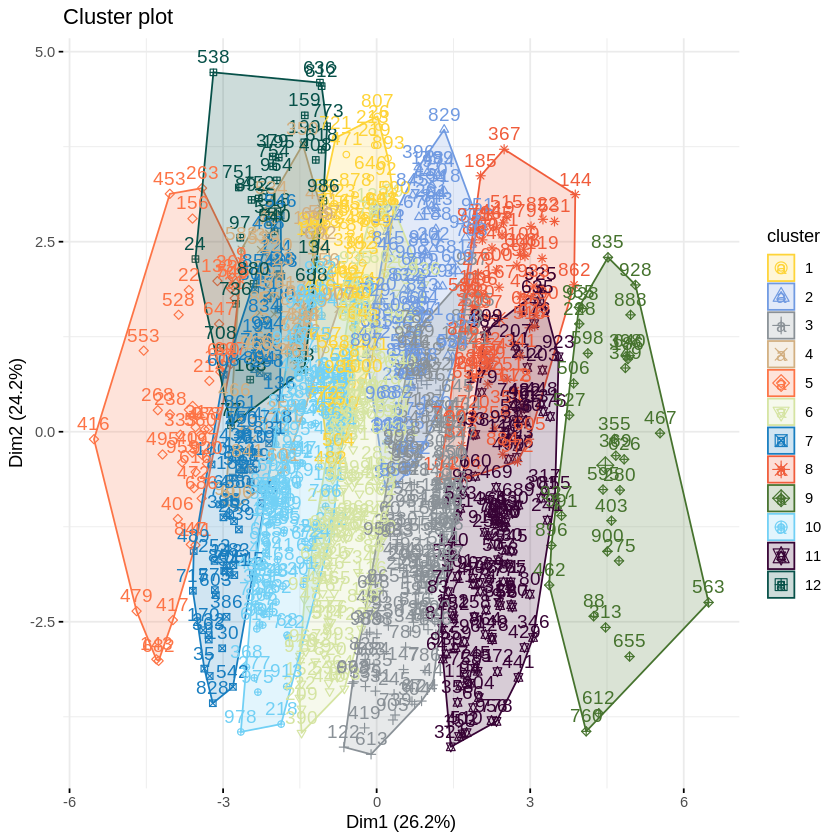

In [43]:
set.seed(123)
pal_color = "simpsons"

kplot2 <- kmeans(Training.set, centers = 2, iter.max = 25, nstart = 1)
plot2 <-  fviz_cluster(kplot2, data = Training.set, ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot2

set.seed(123)
kplot3 <- kmeans(Training.set, centers = 3, iter.max = 25, nstart = 1)
plot3 <-  fviz_cluster(kplot3, data = Training.set,ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot3

set.seed(123)
kplot4 <- kmeans(Training.set, centers = 4, iter.max = 25, nstart = 1)
plot4 <-  fviz_cluster(kplot4, data = Training.set, ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot4

set.seed(123)
kplot5 <- kmeans(Training.set, centers = 5, iter.max = 25, nstart = 1)
plot5 <-  fviz_cluster(kplot5, data = Training.set,ellipse.type = "convex", palette = pal_color,ggtheme = theme_minimal())
plot5

set.seed(123)
kplot6 <- kmeans(Training.set, centers = 6, iter.max = 25, nstart = 1)
plot6 <-  fviz_cluster(kplot6, data = Training.set,ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot6

set.seed(123)
kplot7 <- kmeans(Training.set, centers = 7, iter.max = 25, nstart = 1)
plot7 <-  fviz_cluster(kplot7, data = Training.set,ellipse.type = "convex",palette = pal_color, ggtheme = theme_minimal())
plot7

set.seed(123)
kplot8 <- kmeans(Training.set, centers = 8, iter.max = 25, nstart = 1)
plot8 <-  fviz_cluster(kplot8, data = Training.set,ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot8

set.seed(123)
kplot9 <- kmeans(Training.set, centers = 9, iter.max = 25, nstart = 1)
plot9 <-  fviz_cluster(kplot9, data = Training.set,ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot9


set.seed(123)
kplot10 <- kmeans(Training.set, centers = 10, iter.max = 25, nstart = 1)
plot10 <-  fviz_cluster(kplot10, data = Training.set,ellipse.type = "convex", palette = pal_color,ggtheme = theme_minimal())
plot10

set.seed(123)
kplot11 <- kmeans(Training.set, centers = 11, iter.max = 25, nstart = 1)
plot11 <-  fviz_cluster(kplot11, data = Training.set,ellipse.type = "convex", palette = pal_color,ggtheme = theme_minimal())
plot11

set.seed(123)
kplot12 <- kmeans(Training.set, centers = 12, iter.max = 25, nstart = 1)
plot12 <-  fviz_cluster(kplot12, data = Training.set,ellipse.type = "convex",palette = pal_color,ggtheme = theme_minimal())
plot12


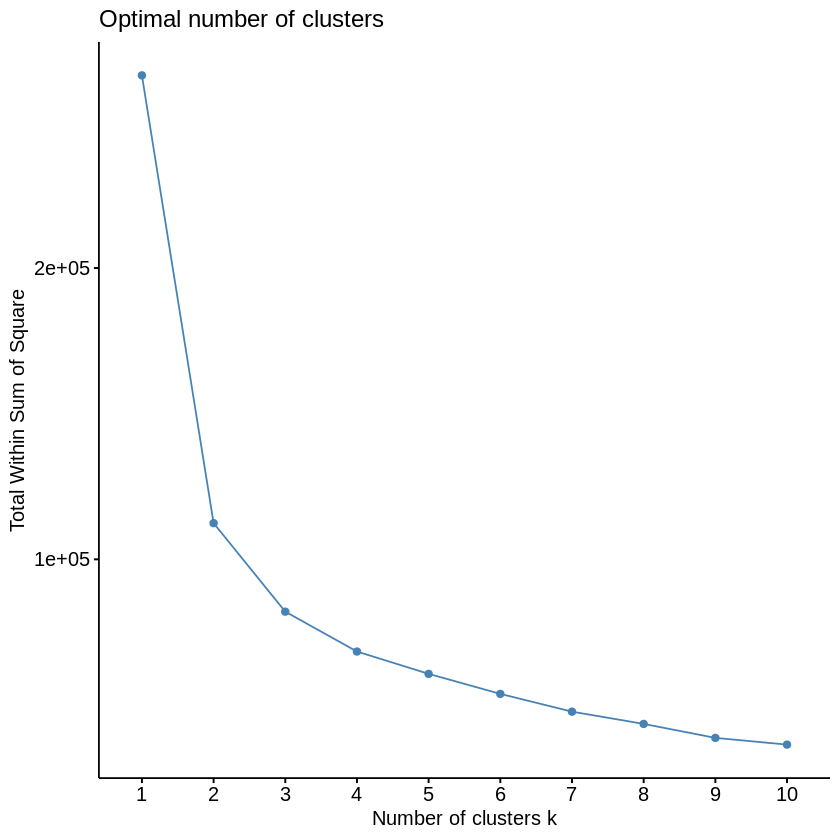

In [44]:
set.seed(123)
fviz_nbclust(Training.set, kmeans, method = "wss")

In [45]:
kplot12$size
kplot12$centers

[1]  61  79 142  43  40 123  65  68  32 115 102  30

genero    admision.letras admision.numeros promedio.preparatoria
1  0.4590164 58.06022        31.12044         64.22752             
2  0.4430380 61.11272        37.22544         73.33815             
3  0.3239437 62.64771        40.29541         77.94312             
4  0.4186047 54.95433        24.90866         60.09164             
5  0.4500000 50.20282        15.40564         60.00000             
6  0.4146341 59.46333        33.92666         68.38999             
7  0.2769231 53.79678        22.59356         60.00000             
8  0.4705882 64.80062        44.60125         84.40187             
9  0.4375000 70.53223        56.06445         98.40075             
10 0.3739130 56.91408        28.82817         61.46394             
11 0.4509804 65.96173        46.92346         87.88519             
12 0.5000000 53.40013        21.80025         60.00000             
   edad.ingreso evalucion.socioeconomica f_as_1    f_as_2    f_examenes_1
1  16.75410     3.295082                 12.491803  9.786885 12.78689    
2  17.98734     3.329114                 10.531646 10.101266 12.82278    
3  18.56338     3.619718                  2.852113  4.253521 13.91549    
4  15.46512     3.581395                 10.372093  5.534884 13.16279    
5  13.57500     3.550000                  3.750000  5.225000 13.70000    
6  17.26016     3.365854                  3.349593  4.406504 13.75610    
7  15.03077     3.646154                  2.723077  4.169231 14.03077    
8  19.41176     3.514706                 11.014706 10.676471 12.77941    
9  21.81250     3.500000                  6.718750  6.406250 13.18750    
10 16.31304     3.391304                  2.600000  4.834783 13.86087    
11 19.88235     3.401961                  2.539216  4.215686 13.71569    
12 14.93333     3.133333                 11.200000 13.666667 12.56667    
   f_examenes_2 f_bibl_1 f_bibl_2 distribucion.becas f_pagos_status
1  12.73770     1.196721 1.327869 0.24590164         0.8360656     
2  12.74684     1.189873 1.392405 0.22784810         0.7848101     
3  13.58451     2.978873 3.500000 0.10563380         0.6971831     
4  12.81395     1.627907 1.604651 0.11627907         0.7674419     
5  13.35000     2.625000 3.075000 0.10000000         0.6750000     
6  13.62602     2.772358 3.235772 0.21138211         0.7154472     
7  13.47692     3.107692 3.230769 0.07692308         0.6461538     
8  12.55882     1.014706 1.102941 0.11764706         0.7058824     
9  13.00000     1.875000 2.218750 0.12500000         0.8125000     
10 13.71304     2.956522 3.408696 0.21739130         0.7043478     
11 13.78431     2.774510 3.392157 0.20588235         0.7352941     
12 12.70000     0.800000 1.066667 0.26666667         0.6000000     
   cambio.carrera
1  0.14754098    
2  0.08860759    
3  0.05633803    
4  0.09302326    
5  0.07500000    
6  0.13821138    
7  0.04615385    
8  0.08823529    
9  0.06250000    
10 0.13043478    
11 0.13725490    
12 0.20000000

### Insights about the K choosed (K=12)

**The students will be separated in two groups:**

> Students at risk of dropping out

> Students who do not drop out

Lets clarify some features of this analysis:

1.   The variable "**f_as_1**" is the percentage of absence of the student in semester 1 and the variable "**f_as_2**"  is the percentage of absence of the student in semester 2, if the value is very high then the student has been absent many times in that semester and this is an indicator of possible dropout, the clusters 1, 2, 8 and 12 are the hihger values for these variables

2. The variable "**f_examenes_1**" is the average of the student's exam scores in semester 1 and the variable "**f_examenes_2** is the average of the student's exams scores for semester 2, in the previous table it can be seen that both are the lower for clusters 1, 2, 8 and 12, these are very clear indicators of a possible risk of dropout.

3. The variables "**f_bibl_1**" is the factor of university use of the library in semester 1 and the variable "**f_bibl_2**" is the factor of university use of the library for semester 2 of the student, both variables mean how frequent the use is of the university's educational resources for a student and their interest in studying and researching. A very low value represents a possible dropout case, the clusters 1, 2, 8 and 12 are the lower values for these variables.



In [46]:
Training.set <- cbind(Training.set, cluster = kplot12$cluster) 
Training.set <- cbind(Training.set, dropout = kplot12$cluster)

Training.set[Training.set$cluster==1,]$dropout  <- 1
Training.set[Training.set$cluster==2,]$dropout  <- 1
Training.set[Training.set$cluster==8,]$dropout  <- 1
Training.set[Training.set$cluster==12,]$dropout <- 1

Training.set[Training.set$cluster==3,]$dropout  <- 0
Training.set[Training.set$cluster==4,]$dropout  <- 0
Training.set[Training.set$cluster==5,]$dropout  <- 0
Training.set[Training.set$cluster==6,]$dropout  <- 0
Training.set[Training.set$cluster==7,]$dropout  <- 0
Training.set[Training.set$cluster==9,]$dropout  <- 0
Training.set[Training.set$cluster==10,]$dropout <- 0
Training.set[Training.set$cluster==11,]$dropout <- 0

Training.set$cluster <- NULL

In [47]:
sum(Training.set$dropout==1)
sum(Training.set$dropout==0)

[1] 238

[1] 662

# **Data Normalization**

In [48]:
test_rows <- rownames(Test.set)

Training.set <- as.data.frame(scale(Training.set))
Test.set <- as.data.frame(scale(Test.set))

normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}

Training.set <- as.data.frame(lapply(Training.set, normalize))
Test.set <- as.data.frame(lapply(Test.set, normalize)) 

rownames(Test.set) <- test_rows


# **Splitting the 900 students in two groups, Training (700) and Evaluation (200)**

In [49]:
set.seed(12345)

rows <- sample(nrow(Training.set))
Complete.set <- Training.set[rows, ]

Training.set   <- tail(Complete.set, 700)
Evaluation.set <- head(Complete.set, 200)

nrow(Training.set)
nrow(Evaluation.set)

[1] 700

[1] 200

# **Creating a model using ANN to predict possible dropout students**

### Training the model with the 700 students of the Training set

In [50]:
nn=neuralnet(dropout~genero+admision.letras+admision.numeros+promedio.preparatoria+edad.ingreso+evalucion.socioeconomica+f_as_1+f_as_2+f_examenes_1+f_examenes_2+f_bibl_1+f_bibl_2+distribucion.becas+f_pagos_status+cambio.carrera, 
             data=Training.set, 
             hidden=c(10,5,3), 
             act.fct = "logistic", 
             linear.output = FALSE,
             stepmax=10^5,threshold = 0.01)


In [51]:
plot(nn)

### Testing the model with the 200 students of the Evaluation set

In [52]:
temp_test <- subset(Evaluation.set, select = c("genero","admision.letras","admision.numeros","promedio.preparatoria","edad.ingreso","evalucion.socioeconomica","f_as_1","f_as_2","f_examenes_1","f_examenes_2","f_bibl_1","f_bibl_2","distribucion.becas","f_pagos_status","cambio.carrera"))
nn.results <- compute(nn, temp_test)
results <- data.frame(actual = Evaluation.set$dropout, prediction = nn.results$net.result)

### 94% of accuracy predicting with the evaluation set

In [53]:
roundedresults<-sapply(results,round,digits=0)
roundedresultsdf=data.frame(roundedresults)
attach(roundedresultsdf)
confusion_table <- table(actual,prediction)
confusion_table
n <- sum(confusion_table)
diag <- diag(confusion_table) 
accuracy <- sum(diag) / n
accuracy

The following objects are masked from roundedresultsdf (pos = 3):

    actual, prediction




      prediction
actual   0   1
     0 145   4
     1   8  43

[1] 0.94

### Testing the  model with the 100 students of the Test set

In [54]:
temp_test <- subset(Test.set, select = c("genero","admision.letras","admision.numeros","promedio.preparatoria","edad.ingreso","evalucion.socioeconomica","f_as_1","f_as_2","f_examenes_1","f_examenes_2","f_bibl_1","f_bibl_2","distribucion.becas","f_pagos_status","cambio.carrera"))
nn.results <- compute(nn, temp_test)
results <- data.frame(row= rownames(Test.set), prediction = round(nn.results$net.result))
students_prediction_rows <- as.vector(results[results$prediction==1,]$row)

# **Showing the most likely students which could dropout**

In [138]:
Test.set.aux <- subset(Test.set.aux, select = c("genero","admision.letras","admision.numeros","promedio.preparatoria","edad.ingreso","evalucion.socioeconomica","f_as_1","f_as_2","f_examenes_1","f_examenes_2","f_bibl_1","f_bibl_2","distribucion.becas","f_pagos_status","cambio.carrera"))
dropout_students <- Test.set.aux[students_prediction_rows,]
dropout_students$id_alumno <- seq(1:length(students_prediction_rows))
dropout_students


genero admision.letras admision.numeros promedio.preparatoria edad.ingreso
28  0      55.63921        26.27841         60.00000              16          
161 1      63.26583        41.53166         79.79749              19          
288 0      58.71338        32.42675         66.14013              17          
310 1      54.11977        23.23953         60.00000              15          
451 1      65.81984        46.63968         87.45951              20          
484 0      64.19345        43.38690         82.58035              19          
499 1      55.45277        25.90553         60.00000              16          
569 0      61.83595        38.67190         75.50785              18          
698 0      63.26870        41.53740         79.80610              19          
715 1      63.83708        42.67415         81.51123              19          
726 0      56.99507        28.99013         60.98520              16          
819 0      56.33342        27.66684         60.00000              16          
826 0      59.89541        34.79082         69.68623              17          
858 1      65.12464        45.24927         85.37391              20          
899 0      57.91743        30.83486         63.75228              17          
981 1      62.70804        40.41608         78.12412              19          
    evalucion.socioeconomica f_as_1 f_as_2 f_examenes_1 f_examenes_2 f_bibl_1
28  4                        11     22     12           12           0       
161 3                         8      5     12           13           1       
288 4                         9     12     12           12           0       
310 3                        22     10     14           11           3       
451 3                        21     14     13           14           1       
484 4                        14     14     13           12           1       
499 3                         9     12     12           13           0       
569 4                         9      6     12           12           0       
698 4                         5     13     14           13           2       
715 3                        11      6     14           15           3       
726 4                         8     10     14           13           2       
819 4                         7     14     14           13           2       
826 4                         7      6     12           13           1       
858 4                         9     13     13           12           1       
899 4                        14     16     12           12           0       
981 3                        16      9     13           12           1       
    f_bibl_2 distribucion.becas f_pagos_status cambio.carrera id_alumno
28  0        0                  1              0               1       
161 2        0                  1              0               2       
288 0        0                  0              0               3       
310 0        0                  0              0               4       
451 3        0                  1              0               5       
484 0        0                  1              0               6       
499 2        0                  1              0               7       
569 0        0                  1              0               8       
698 2        0                  1              0               9       
715 5        0                  1              0              10       
726 2        0                  1              0              11       
819 2        0                  1              0              12       
826 2        0                  1              0              13       
858 2        0                  0              0              14       
899 0        0                  1              0              15       
981 0        0                  1              0              16

# **Use of Genetic Algorithm for avoid Students Dropout**

In [ ]:
#10000 USD
budget.limit <- 10000 

items <- data.frame(                    

student.features = c('beca.estudiantil', 'vales.transporte',
                     'consulta.psicologica', 'asesor.individual',
                     'curso.remedial', 'visita.empresa',
                     'platica.motivacional', 'viaje.recreativo',
                     'mentoria', 'comedor.gratuito'),

budget.features = c(500, 100, 
                   300, 200, 
                   1000,30,
                   50, 150,
                   200, 250)                   
)

n_students <- length(students_prediction_rows)
n_features <- nrow(items)

get_budget_chromosome <- function(g, b, nf){
    budget <- 0

    for(i in 1:nf){
        if(g[i]==1){  budget <- budget + b[i] }            
    }

    budget 
}

get_punishment<- function(i, g){

    punish.value <- 0

   #Get genetic data from the chunk related to the student
    beca <- g[1]
    asesor.individual <- g[4]
    curso.remedial <- g[5]
    platica.motivacional <-g[7]
    mentoria <- g[9]
    comedor.gratuito <- g[10]

    #Get the actual data from the student
    std <- dropout_students[dropout_students$id_alumno==i,]
    eval.economica <- as.integer(std$evalucion.socioeconomica)
    prom.prepa <- as.double(std$promedio.preparatoria)
    edad <- as.integer(std$edad.ingreso)
    cambio.carrera <- as.integer(std$cambio.carrera)
    f_pagos_status <- as.integer(std$f_pagos_status)
    beca_estudiante <- as.integer(std$distribucion.becas)

    flag = FALSE

    if(beca == 1 && beca_estudiante == 1){
        punish.value <- punish.value + 50
        flag = TRUE    
    }
    if(edad < 22 && platica.motivacional == 0){
        punish.value <- punish.value + 20
        flag = TRUE
    }
    if(cambio.carrera == 1 && platica.motivacional == 0){
        punish.value <- punish.value + 10
        flag = TRUE
    }
    if(f_pagos_status==0 && eval.economica == 4 && beca_estudiante == 0){
        punish.value <- punish.value + 50
        flag = TRUE
    }
    if(prom.prepa > 70  && eval.economica == 4 && beca_estudiante == 0){
        punish.value <- punish.value + 60
        flag = TRUE
    }
    if(prom.prepa <= 70  && eval.economica == 4 && beca_estudiante == 0){
        punish.value <- punish.value + 20
        flag = TRUE
    }
    if(eval.economica == 3 && edad < 22 && asesor.individual == 0){
        punish.value <- punish.value + 20
        flag = TRUE
    }
    else { }
    
    punish.value <- if(flag==FALSE) -1 else punish.value
    
    punish.value

}

fitness.generic <- function(x) {


    current.budget <- 0
    punish.value <- -1

    iter <- 1
    for(i in 1:n_students) {
        
        student_genes <- x[iter:(n_features * i)]
        current.budget <- current.budget + get_budget_chromosome(student_genes,items$budget.features,n_features)    
        punish.value <- punish.value + get_punishment(i, student_genes)
        iter <- iter + n_features

    }

    if(current.budget > budget.limit){
        return(0)
    }
    else{
        return(punish.value)
    }
}



?rbga.bin
ga.one <- rbga.bin(size=(n_students*n_features),
                   iters=200,
                   mutationChance=0.01,
                   elitism = 50,
                   evalFunc = fitness.generic,
                   verbose = T
)

In [134]:
Finalbudget <- 0
best <- ga.one$population[ga.one$evaluations == min(ga.one$best),][1,]

iter <- 1
for(i in 1:n_students) {
    
    best_genes <- best[iter:(n_features * i)]
    print(rownames(dropout_students[dropout_students$id_alumno==i,]))
    print(best_genes)
    best.items <- items$student.features[best_genes == 1]
    print(best.items)
    Finalbudget <- Finalbudget + best_genes %*% items$budget.features
    iter <- iter + n_features
}

Finalbudget

[1] "28"
 [1] 0 0 0 0 0 0 1 0 0 0
[1] platica.motivacional
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "161"
 [1] 0 0 0 1 0 0 1 0 0 0
[1] asesor.individual    platica.motivacional
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "288"
 [1] 0 0 0 0 0 0 1 1 0 0
[1] platica.motivacional viaje.recreativo    
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "310"
 [1] 0 0 0 1 0 1 1 0 0 0
[1] asesor.individual    visita.empresa       platica.motivacional
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "451"
 [1] 0 0 0 1 0 0 1 0 0 0
[1] asesor.individual    platica.motivacional
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "484"
 [1] 0 0 0 0 0 0 1 0 0 0
[1] platica.motivacional
10 Levels: asesor.individual beca.estudiantil ... visita.empresa
[1] "499"
 [1] 0 1 0 1 0 0 1 0 0 0
[1] vales.transporte     asesor.individual    platica.motivacional
10 Levels: asesor.individual beca.estudianti

[,1]
[1,] 5240

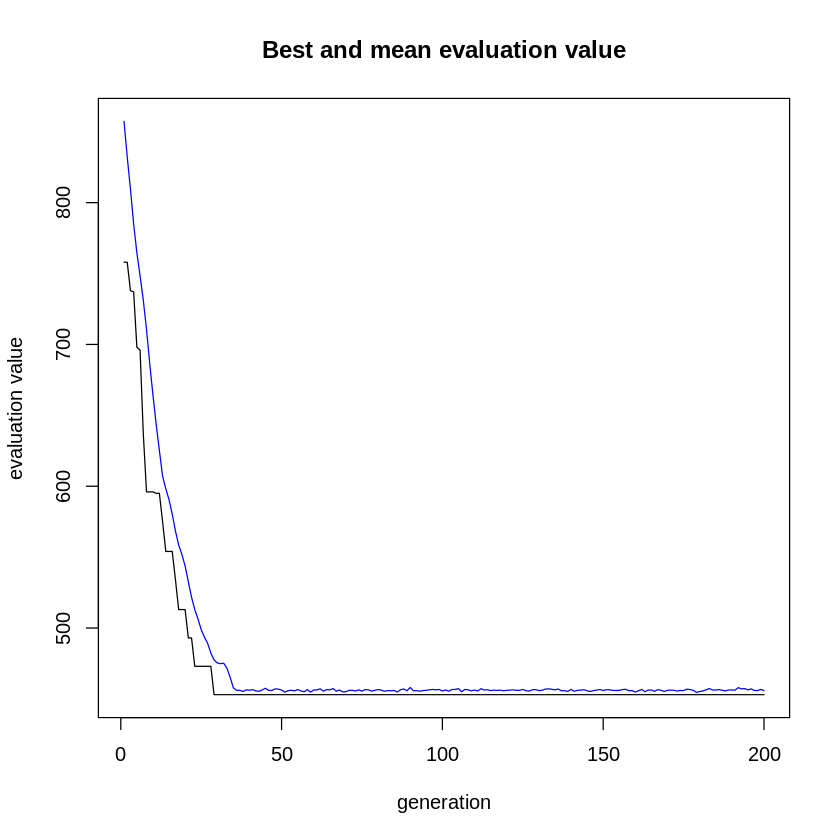

In [131]:
plot(ga.one)